In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools
import netCDF4 as nc
import numpy as np

%matplotlib inline

In [63]:
df=pd.read_excel('/data/eolson/results/MEOPAR/ParameterMethodSiteList_1999-present.xlsx',
                 sheet_name='Site Info',engine='openpyxl')
df.dropna(axis=0,how='all',inplace=True)

In [64]:
df.drop(df.tail(1).index,inplace=True)

In [65]:
df.head()

,Station,Lat_NAD83 (deg / dec_min),Long_NAD83 (deg / dec_min),Desig,Descrip,Basin,*Max_Depth
0,ADM001,48 1.7888,122 37.076,C,Admiralty Inlet - Bush Pt.,Admiralty Inlet,114.0
1,ADM002,48 11.2391,122 50.577,C,Admiralty Inlet (north) - Quimper Pn.,Admiralty Inlet,79.0
2,ADM003,47 52.739,122 28.9917,C,Admiralty Inlet (south),Admiralty Inlet,118.0
3,BLL009,48 41.1564,122 35.9771,C,Bellingham Bay - Pt. Frances,Strait of Georgia,31.0
4,BUD005,47 5.5224,122 55.0918,C,Budd Inlet - Olympia Shoal,South Basin,22.0


In [66]:
def convLatLon(ldegm):
    ar=ldegm.split(' ')
    return np.float(ar[0])+np.float(ar[1])/60

In [67]:
convLatLon(df['Lat_NAD83 (deg / dec_min)'][0])

48.02981333333334

In [68]:
df['Lat']=[convLatLon(ii) for ii in df['Lat_NAD83 (deg / dec_min)']]
df['Lon']=[-1*convLatLon(ii) for ii in df['Long_NAD83 (deg / dec_min)']]

/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/viz_tools.py:123: UserWarning: No contour levels were found within the data range.
  contour_lines = axes.contour(


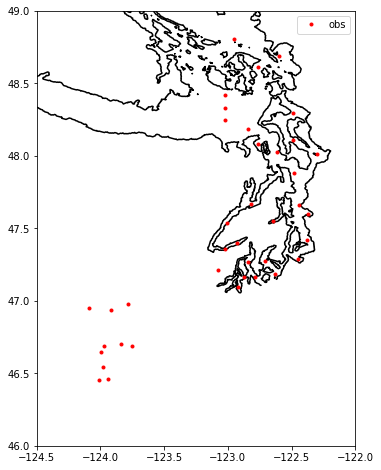

In [73]:
# plot matched data locations
fig, ax = plt.subplots(figsize = (8,8))
viz_tools.set_aspect(ax, coords = 'map')
ax.plot(df['Lon'], df['Lat'], 'ro',label='obs',ms=3)
grid = nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')
viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(46,49)
ax.legend()
ax.set_xlim(-124.5, -122);